# 1.NSCLC Sex-stratified SC Analysis

## Data selection, pseudobulk, create input for DESEQ2

In [2]:
import warnings
import numpy as np
import pandas as pd 
import scanpy as sc
#import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#import altair as alt
#import pertpy as pt
#from pandas.api.types import is_categorical_dtype
#from pandas import CategoricalDtype

In [3]:
import decoupler as dc

/home/kvalem/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#Set result directory for figures
resDir = "/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/011_analysis_paired_remove_xy/figures/"
sc.settings.figdir = resDir

In [5]:
dc.__version__

'1.8.0'

In [6]:
path = "/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp"
input_path    = f"{path}/data/local.h5ad"

In [7]:
adata = sc.read_h5ad(input_path) 

In [8]:
adata

AnnData object with n_obs × n_vars = 1283972 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts'

In [8]:
adata.obs.dataset.value_counts()

dataset
Kim_Lee_2020                                        175526
Adams_Kaminski_2020                                 131092
Leader_Merad_2021_10x_3p_v2_beads                   121265
UKIM-V-2                                            102115
Chen_Zhang_2020                                      93035
He_Fan_2021                                          88876
Leader_Merad_2021_10x_3p_v2_digest-deadcell_cite     68436
Leader_Merad_2021_10x_3p_v2_beads_cite               62468
Wu_Zhou_2021                                         58981
Madissoon_Meyer_2020                                 46116
Lambrechts_Thienpont_2018_6149v2                     40141
Habermann_Kropski_2020                               36727
Goveia_Carmeliet_2020                                36368
Reyfman_Misharin_2018                                34535
Laughney_Massague_2020                               26403
Zilionis_Klein_2019                                  25652
Lambrechts_Thienpont_2018_6653                  

In [9]:
nsclc_chrom = pd.read_csv(f"{path}/out/007_re_analysis/tables/input/adata_var_nsclc_chrom.csv")

In [10]:
adata

AnnData object with n_obs × n_vars = 1283972 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts'

In [11]:
adata.obs.disease.value_counts()

disease
lung adenocarcinoma                      704834
normal                                   212889
squamous cell lung carcinoma             190199
non-small cell lung carcinoma            120796
chronic obstructive pulmonary disease     55254
Name: count, dtype: int64

In [12]:
adata.obs.tumor_stage.value_counts()

tumor_stage
early         725412
advanced      288981
non-cancer    268143
Name: count, dtype: int64

In [13]:
adata.obs.sex.value_counts()

sex
male       676587
female     571042
unknown     36343
Name: count, dtype: int64

In [14]:
adata.obs.origin.value_counts()

origin
tumor_primary       585138
normal_adjacent     345211
normal              281363
tumor_metastasis     71272
nan                    988
Name: count, dtype: int64

In [15]:
adata.obs.dataset.value_counts()

dataset
Kim_Lee_2020                                        175526
Adams_Kaminski_2020                                 131092
Leader_Merad_2021_10x_3p_v2_beads                   121265
UKIM-V-2                                            102115
Chen_Zhang_2020                                      93035
He_Fan_2021                                          88876
Leader_Merad_2021_10x_3p_v2_digest-deadcell_cite     68436
Leader_Merad_2021_10x_3p_v2_beads_cite               62468
Wu_Zhou_2021                                         58981
Madissoon_Meyer_2020                                 46116
Lambrechts_Thienpont_2018_6149v2                     40141
Habermann_Kropski_2020                               36727
Goveia_Carmeliet_2020                                36368
Reyfman_Misharin_2018                                34535
Laughney_Massague_2020                               26403
Zilionis_Klein_2019                                  25652
Lambrechts_Thienpont_2018_6653                  

### 01.SELECT ONLY male, female & tumor, normal_adjacent

In [16]:
adata = adata[(adata.obs["disease"] != "normal") & (adata.obs["disease"] != "chronic obstructive pulmonary disease")] #exclude normal and COPD samples

In [17]:
adata = adata[adata.obs["tumor_stage"].notna()] #exclude samples without tumor stage

In [18]:
adata = adata[(adata.obs["sex"]=="male")| (adata.obs["sex"]=="female")]

In [19]:
adata = adata[(adata.obs["origin"]=="tumor_primary")| (adata.obs["origin"]=="normal_adjacent")]

In [20]:
adata.obs.disease.value_counts()

disease
lung adenocarcinoma              577317
squamous cell lung carcinoma     189044
non-small cell lung carcinoma    120796
Name: count, dtype: int64

In [21]:
adata.obs.tumor_stage.value_counts()

tumor_stage
early       672760
advanced    214397
Name: count, dtype: int64

In [22]:
adata.obs.sex.value_counts()

sex
male      500302
female    386855
Name: count, dtype: int64

In [23]:
adata.obs.origin.value_counts()

origin
tumor_primary      571045
normal_adjacent    316112
Name: count, dtype: int64

In [24]:
adata.obs.dataset.value_counts()

dataset
Leader_Merad_2021_10x_3p_v2_beads                   119829
UKIM-V-2                                            102115
Chen_Zhang_2020                                      93035
He_Fan_2021                                          88876
Kim_Lee_2020                                         86310
Leader_Merad_2021_10x_3p_v2_digest-deadcell_cite     68436
Leader_Merad_2021_10x_3p_v2_beads_cite               62468
Wu_Zhou_2021                                         58981
Lambrechts_Thienpont_2018_6149v2                     40141
Goveia_Carmeliet_2020                                36368
Zilionis_Klein_2019                                  25652
Lambrechts_Thienpont_2018_6653                       22617
UKIM-V                                               20787
Leader_Merad_2021_10x_5p_v1_CD2                      14894
Leader_Merad_2021_10x_3p_v3_beads                     9646
Leader_Merad_2021_10x_3p_v2_sort                      7922
Guo_Zhang_2018                                  

### 02.CELL TPYE RE-CLASIFICATION 

In [25]:
adata.obs.cell_type.value_counts()

cell_type
CD4-positive, alpha-beta T cell         152247
CD8-positive, alpha-beta T cell         123252
alveolar macrophage                      82844
macrophage                               78660
malignant cell                           75457
natural killer cell                      50680
B cell                                   44609
classical monocyte                       43364
regulatory T cell                        33603
plasma cell                              31876
epithelial cell of lung                  23013
CD1c-positive myeloid dendritic cell     20734
neutrophil                               18706
type II pneumocyte                       16274
vein endothelial cell                    15849
mast cell                                14361
capillary endothelial cell               10870
multi-ciliated epithelial cell            6413
non-classical monocyte                    6103
myeloid cell                              5544
fibroblast of lung                        5091
bro

In [26]:
adata.obs.cell_type_major.value_counts()

cell_type_major
T cell CD4               149343
T cell CD8               120586
Macrophage alveolar       82844
Macrophage                78660
Tumor cells               75457
NK cell                   50094
Monocyte                  49467
B cell                    44307
T cell regulatory         33603
Endothelial cell          32443
Plasma cell               30292
transitional club/AT2     22894
cDC2                      20734
Neutrophils               18706
Alveolar cell type 2      16274
Mast cell                 14361
other                     14017
Stromal                   13948
Ciliated                   6413
pDC                        3800
Alveolar cell type 1       3739
cDC1                       2097
Club                       1580
DC mature                  1498
Name: count, dtype: int64

In [27]:
cells_of_interest=['alveolar macrophage', 'neutrophil','dendritic cell',
 'macrophage','malignant cell',
 'B cell',
  'regulatory T cell',
'CD4-positive, alpha-beta T cell',
 'CD8-positive, alpha-beta T cell',
 'neutrophils','epithelial cell of lung','multi-ciliated epithelial cell' ]
subset_adata = adata[adata.obs["cell_type"].isin(cells_of_interest)] 


In [28]:
set(subset_adata.obs.cell_type)

{'B cell',
 'CD4-positive, alpha-beta T cell',
 'CD8-positive, alpha-beta T cell',
 'alveolar macrophage',
 'dendritic cell',
 'epithelial cell of lung',
 'macrophage',
 'malignant cell',
 'multi-ciliated epithelial cell',
 'neutrophil',
 'regulatory T cell'}

In [29]:
set(subset_adata.obs.cell_type_major)

{'B cell',
 'Ciliated',
 'DC mature',
 'Macrophage',
 'Macrophage alveolar',
 'Neutrophils',
 'T cell CD4',
 'T cell CD8',
 'T cell regulatory',
 'Tumor cells',
 'other',
 'transitional club/AT2'}

In [30]:
subset_adata.obs["cell_type"]= subset_adata.obs["cell_type"].replace(['epithelial cell of lung','multi-ciliated epithelial cell',], 'epithelial cell')
subset_adata.obs["cell_type"]= subset_adata.obs["cell_type"].replace(['alveolar macrophage'], 'macrophage')
subset_adata.obs["cell_type"]= subset_adata.obs["cell_type"].replace(['CD4-positive, alpha-beta T cell'], 'CD4+ T cell')
subset_adata.obs["cell_type"]= subset_adata.obs["cell_type"].replace(['CD8-positive, alpha-beta T cell'], 'CD8+ T cell')

/tmp/ipykernel_3704041/2170802957.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  subset_adata.obs["cell_type"]= subset_adata.obs["cell_type"].replace(['epithelial cell of lung','multi-ciliated epithelial cell',], 'epithelial cell')
/tmp/ipykernel_3704041/2170802957.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset_adata.obs["cell_type"]= subset_adata.obs["cell_type"].replace(['epithelial cell of lung','multi-ciliated epithelial cell',], 'epithelial cell')
/tmp/ipykernel_3704041/2170802957.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the catego

In [31]:
set(subset_adata.obs.cell_type)

{'B cell',
 'CD4+ T cell',
 'CD8+ T cell',
 'dendritic cell',
 'epithelial cell',
 'macrophage',
 'malignant cell',
 'neutrophil',
 'regulatory T cell'}

In [32]:
subset_adata

AnnData object with n_obs × n_vars = 640302 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts',

In [33]:
subset_adata.obs.disease.value_counts()

disease
lung adenocarcinoma              410708
squamous cell lung carcinoma     134857
non-small cell lung carcinoma     94737
Name: count, dtype: int64

In [34]:
subset_adata.obs.dataset.value_counts()

dataset
Leader_Merad_2021_10x_3p_v2_beads                   82006
UKIM-V-2                                            78658
Chen_Zhang_2020                                     72963
He_Fan_2021                                         68824
Kim_Lee_2020                                        59085
Wu_Zhou_2021                                        46428
Leader_Merad_2021_10x_3p_v2_digest-deadcell_cite    44036
Leader_Merad_2021_10x_3p_v2_beads_cite              41132
Lambrechts_Thienpont_2018_6149v2                    32401
Zilionis_Klein_2019                                 19832
Lambrechts_Thienpont_2018_6653                      16705
UKIM-V                                              16281
Goveia_Carmeliet_2020                               14639
Leader_Merad_2021_10x_5p_v1_CD2                     13427
Leader_Merad_2021_10x_3p_v3_beads                    8007
Guo_Zhang_2018                                       7157
Leader_Merad_2021_10x_3p_v2_sort                     4624
Leader

In [35]:
subset_adata.obs.dataset.value_counts()

dataset
Leader_Merad_2021_10x_3p_v2_beads                   82006
UKIM-V-2                                            78658
Chen_Zhang_2020                                     72963
He_Fan_2021                                         68824
Kim_Lee_2020                                        59085
Wu_Zhou_2021                                        46428
Leader_Merad_2021_10x_3p_v2_digest-deadcell_cite    44036
Leader_Merad_2021_10x_3p_v2_beads_cite              41132
Lambrechts_Thienpont_2018_6149v2                    32401
Zilionis_Klein_2019                                 19832
Lambrechts_Thienpont_2018_6653                      16705
UKIM-V                                              16281
Goveia_Carmeliet_2020                               14639
Leader_Merad_2021_10x_5p_v1_CD2                     13427
Leader_Merad_2021_10x_3p_v3_beads                    8007
Guo_Zhang_2018                                       7157
Leader_Merad_2021_10x_3p_v2_sort                     4624
Leader

## PAIRED SAMPLES

In [36]:
df_grouped = subset_adata.obs.groupby(["origin","donor_id"]).count()

/tmp/ipykernel_3704041/1850072068.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = subset_adata.obs.groupby(["origin","donor_id"]).count()


In [37]:
df_grouped.reset_index(inplace= True)

In [38]:
df_grouped_normal = df_grouped[df_grouped["origin"]=="normal_adjacent"]

In [39]:
df_grouped_normal = df_grouped_normal[df_grouped_normal['sample'] != 0]

In [40]:
df_grouped_tumor = df_grouped[df_grouped["origin"]=="tumor_primary"]

In [41]:
df_grouped_tumor = df_grouped_tumor[df_grouped_tumor['sample'] != 0]

In [42]:
df_grouped_tumor

,origin,donor_id,sample,uicc_stage,ever_smoker,age,dataset,ann_fine,cell_type_predicted,doublet_status,...,sex_ontology_term_id,tissue_ontology_term_id,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
168,tumor_primary,Chen_Zhang_2020_NSCLC-1,1456,1456,0,0,1456,1456,1456,1456,...,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456
169,tumor_primary,Chen_Zhang_2020_NSCLC-2,3234,3234,0,0,3234,3234,3234,3234,...,3234,3234,3234,3234,3234,3234,3234,3234,3234,3234
170,tumor_primary,Chen_Zhang_2020_NSCLC-3,6367,6367,0,0,6367,6367,6367,6367,...,6367,6367,6367,6367,6367,6367,6367,6367,6367,6367
171,tumor_primary,Chen_Zhang_2020_NSCLC-4,3532,3532,0,0,3532,3532,3532,3532,...,3532,3532,3532,3532,3532,3532,3532,3532,3532,3532
172,tumor_primary,Chen_Zhang_2020_NSCLC-5,7248,7248,0,0,7248,7248,7248,7248,...,7248,7248,7248,7248,7248,7248,7248,7248,7248,7248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,tumor_primary,Zilionis_Klein_2019_patient_3,5289,5289,0,5289,5289,5289,5289,5289,...,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289
332,tumor_primary,Zilionis_Klein_2019_patient_4,3081,3081,0,3081,3081,3081,3081,3081,...,3081,3081,3081,3081,3081,3081,3081,3081,3081,3081
333,tumor_primary,Zilionis_Klein_2019_patient_5,1897,1897,0,1897,1897,1897,1897,1897,...,1897,1897,1897,1897,1897,1897,1897,1897,1897,1897
334,tumor_primary,Zilionis_Klein_2019_patient_6,2918,2918,0,2918,2918,2918,2918,2918,...,2918,2918,2918,2918,2918,2918,2918,2918,2918,2918


In [43]:
common_ids =list(set(df_grouped_normal.donor_id)& set(df_grouped_tumor.donor_id))

In [44]:
len(common_ids)

84

In [45]:
paired_adata = subset_adata[subset_adata.obs['donor_id'].isin(common_ids)].copy()

In [46]:
paired_adata

AnnData object with n_obs × n_vars = 466234 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts',

In [47]:
df = paired_adata.obs#
origin_counts = df.groupby('origin')['donor_id'].nunique().reset_index()
origin_counts.columns = ['origin', 'count']

/tmp/ipykernel_3704041/2715583478.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  origin_counts = df.groupby('origin')['donor_id'].nunique().reset_index()


/tmp/ipykernel_3704041/3457429988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=origin_counts, x='origin', y='count', palette='viridis')


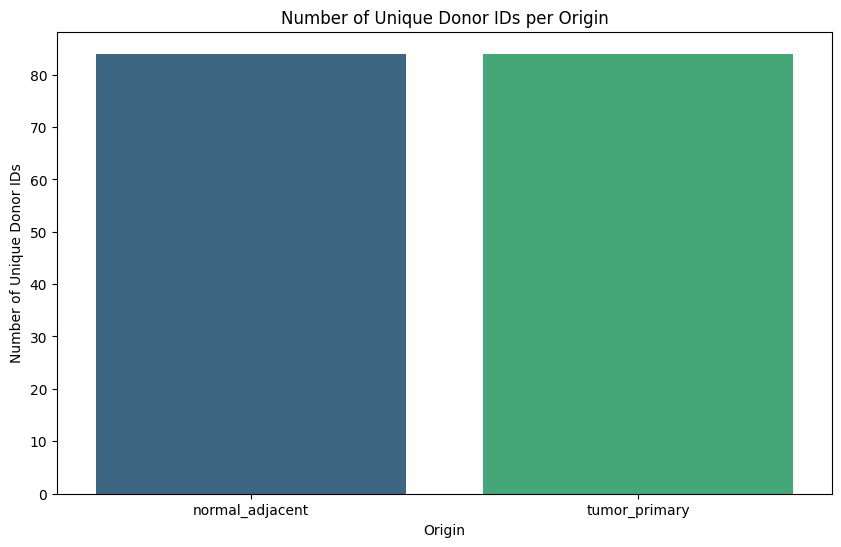

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(data=origin_counts, x='origin', y='count', palette='viridis')
plt.xlabel('Origin')
plt.ylabel('Number of Unique Donor IDs')
plt.title('Number of Unique Donor IDs per Origin')
plt.show()

In [51]:
df = paired_adata.obs#
origin_counts = df.groupby('disease')['donor_id'].nunique().reset_index()
origin_counts.columns = ['disease', 'count']

/tmp/ipykernel_3704041/3679065484.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  origin_counts = df.groupby('disease')['donor_id'].nunique().reset_index()


/tmp/ipykernel_3704041/3057708053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=origin_counts, x='disease', y='count', palette='viridis')


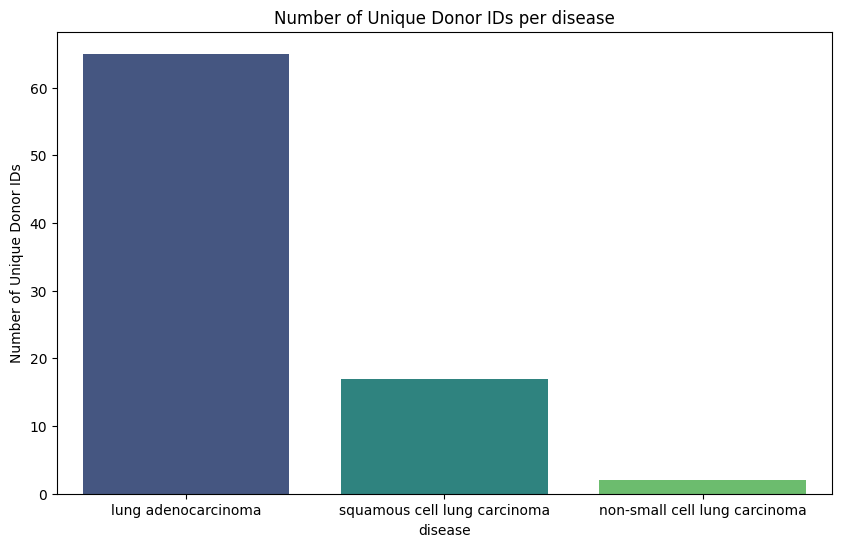

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(data=origin_counts, x='disease', y='count', palette='viridis')
plt.xlabel('disease')
plt.ylabel('Number of Unique Donor IDs')
plt.title('Number of Unique Donor IDs per disease')
plt.show()

In [54]:
paired_adata.obs.disease.value_counts()

disease
lung adenocarcinoma              350066
squamous cell lung carcinoma      95279
non-small cell lung carcinoma     20889
Name: count, dtype: int64

In [55]:
paired_adata.obs.tumor_stage.value_counts()

tumor_stage
early       408495
advanced     57739
Name: count, dtype: int64

In [56]:
paired_adata.obs.sex.value_counts()

sex
female    233782
male      232452
Name: count, dtype: int64

In [57]:
paired_adata.obs.origin.value_counts()

origin
tumor_primary      261494
normal_adjacent    204740
Name: count, dtype: int64

In [58]:
paired_adata.obs.dataset.value_counts()

dataset
UKIM-V-2                                            78658
Leader_Merad_2021_10x_3p_v2_beads                   77310
He_Fan_2021                                         68824
Kim_Lee_2020                                        47125
Leader_Merad_2021_10x_3p_v2_digest-deadcell_cite    44036
Leader_Merad_2021_10x_3p_v2_beads_cite              41132
Lambrechts_Thienpont_2018_6149v2                    32401
Lambrechts_Thienpont_2018_6653                      16705
UKIM-V                                              16281
Goveia_Carmeliet_2020                               14614
Leader_Merad_2021_10x_5p_v1_CD2                     13427
Guo_Zhang_2018                                       5924
Leader_Merad_2021_10x_3p_v2_sort                     4624
Leader_Merad_2021_10x_5p_v1_beads                    3617
Lambrechts_Thienpont_2018_6149v1                     1556
Name: count, dtype: int64

In [59]:
paired_adata

AnnData object with n_obs × n_vars = 466234 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts',

## Keep only  lung adenocarcinoma    

In [60]:
paired_adata_luad = paired_adata[paired_adata.obs["disease"]=="lung adenocarcinoma"]

In [61]:
paired_adata_luad

View of AnnData object with n_obs × n_vars = 350066 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_

In [62]:
df = paired_adata_luad.obs#
origin_counts = df.groupby('origin')['donor_id'].nunique().reset_index()
origin_counts.columns = ['origin', 'count']

/tmp/ipykernel_3704041/3186105425.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  origin_counts = df.groupby('origin')['donor_id'].nunique().reset_index()


/tmp/ipykernel_3704041/3457429988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=origin_counts, x='origin', y='count', palette='viridis')


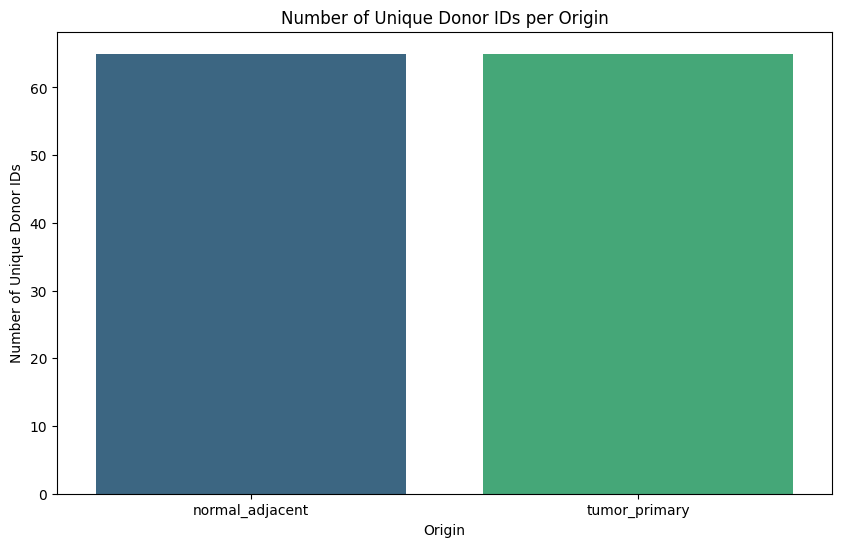

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(data=origin_counts, x='origin', y='count', palette='viridis')
plt.xlabel('Origin')
plt.ylabel('Number of Unique Donor IDs')
plt.title('Number of Unique Donor IDs per Origin')
plt.show()

In [64]:
df = paired_adata_luad.obs#
origin_counts = df.groupby('disease')['donor_id'].nunique().reset_index()
origin_counts.columns = ['disease', 'count']

/tmp/ipykernel_3704041/1416590611.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  origin_counts = df.groupby('disease')['donor_id'].nunique().reset_index()


/tmp/ipykernel_3704041/3116111855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=origin_counts, x='disease', y='count', palette='viridis')


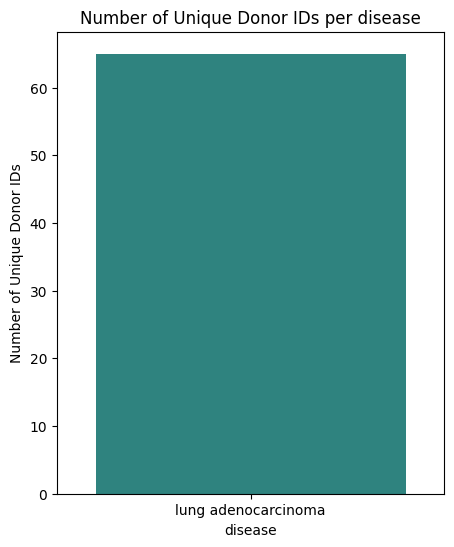

In [67]:
plt.figure(figsize=(5, 6))
sns.barplot(data=origin_counts, x='disease', y='count', palette='viridis')
plt.xlabel('disease')
plt.ylabel('Number of Unique Donor IDs')
plt.title('Number of Unique Donor IDs per disease')
plt.show()

In [66]:
paired_adata = paired_adata_luad

## Create layer Log 1pnorm 

In [61]:
paired_adata.layers["log1p_norm"] = paired_adata.X.copy()
sc.pp.normalize_total(paired_adata, target_sum=1e6, layer="log1p_norm")
sc.pp.log1p(paired_adata, base=6, layer="log1p_norm")

/tmp/ipykernel_3395816/544134483.py:1: ImplicitModificationWarning: Setting element `.layers['log1p_norm']` of view, initializing view as actual.
  paired_adata.layers["log1p_norm"] = paired_adata.X.copy()


In [62]:
paired_adata

AnnData object with n_obs × n_vars = 350066 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts',

## Checking for XIST & RPS4Y1 in male and female

In [63]:
paired_adata.var_names = paired_adata.var.feature_name

/home/kvalem/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:864: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['A1BG', 'A1BG-AS1', 'A2M', 'A2M-AS1', 'A2ML1']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


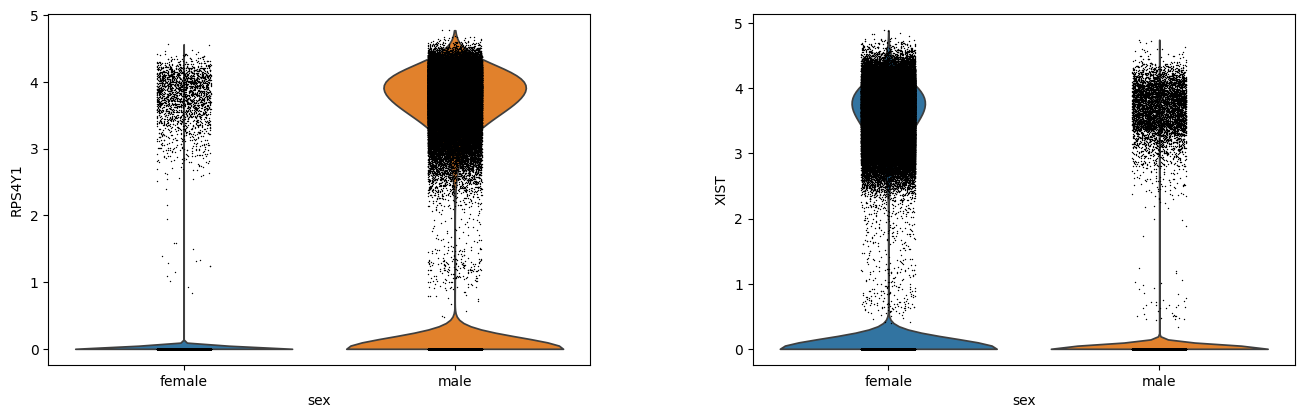

In [64]:
# Now, generate the plot and save it
sc.pl.violin(paired_adata, ["RPS4Y1", "XIST"], use_raw=False, groupby="sex", layer="log1p_norm")#, save="_xy_check.png")

In [65]:
rps4y1_cells = paired_adata[:, paired_adata.var_names == "RPS4Y1"].X > 0
# Subset the adata object to only those cells
rps4y1_paired_adata_subset = paired_adata[rps4y1_cells, :]

In [66]:
rps4y1_paired_adata_subset.obs.sex.value_counts()

sex
male      91588
female     2184
Name: count, dtype: int64

In [67]:
xist_cells = paired_adata[:, paired_adata.var_names == "XIST"].X > 0
# Subset the adata object to only those cells
xist_paired_adata_subset = paired_adata[xist_cells, :]

In [68]:
xist_paired_adata_subset.obs.sex.value_counts()

sex
female    91703
male       5777
Name: count, dtype: int64

In [69]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [70]:
rps4y1_paired_adata_subset.obs.groupby(["sex","donor_id"]).count()

/tmp/ipykernel_3395816/1444904727.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rps4y1_paired_adata_subset.obs.groupby(["sex","donor_id"]).count()


sample  uicc_stage  ever_smoker  \
sex    donor_id                                                              
female Goveia_Carmeliet_2020_patient_50         1           1            1   
       Guo_Zhang_2018_P0616P                    0           0            0   
       Guo_Zhang_2018_P0617                     0           0            0   
       Guo_Zhang_2018_P0729                     2           2            2   
       Guo_Zhang_2018_P1010                     7           7            7   
       Guo_Zhang_2018_P1120                     0           0            0   
       Guo_Zhang_2018_P1219                     6           6            6   
       He_Fan_2021_P1                           6           6            6   
       He_Fan_2021_P2                           0           0            0   
       He_Fan_2021_P4                           0           0            0   
       Kim_Lee_2020_P0006                       0           0            0   
       Kim_Lee_2020_P0009                       0           0            0   
       Kim_Lee_2020_P0018                       0           0            0   
       Kim_Lee_2020_P0019                       0           0            0   
       Kim_Lee_2020_P0020                       0           0            0   
       Kim_Lee_2020_P0028                       0           0            0   
       Kim_Lee_2020_P0030                       0           0            0   
       Kim_Lee_2020_P0031                       0           0            0   
       Kim_Lee_2020_P0034                       0           0            0   
       Lambrechts_Thienpont_2018_6149v2_3       0           0            0   
       Lambrechts_Thienpont_2018_6149v2_4      38          38           38   
       Leader_Merad_2021_370                    1           1            1   
       Leader_Merad_2021_371                    0           0            0   
       Leader_Merad_2021_378                    4           4            4   
       Leader_Merad_2021_403                    0           0            0   
       Leader_Merad_2021_406                 2099        2099         2099   
       Leader_Merad_2021_408                    0           0            0   
       Leader_Merad_2021_460                    0           0            0   
       Leader_Merad_2021_532                    0           0            0   
       Leader_Merad_2021_564                    1           1            1   
       Leader_Merad_2021_570                    0           0            0   
       Leader_Merad_2021_572                    0           0            0   
       Leader_Merad_2021_578                    1           1            1   
       Leader_Merad_2021_593                    2           2            2   
       Leader_Merad_2021_596                    0           0            0   
       Leader_Merad_2021_626                    1           1            1   
       Leader_Merad_2021_630                    0           0            0   
       Leader_Merad_2021_695                    2           2            2   
       Leader_Merad_2021_729                    1           1            1   
       UKIM-V-2_P4                              1           1            1   
       UKIM-V-2_P5                              2           2            2   
       UKIM-V-2_P9                              0           0            0   
       UKIM-V-2_P10                             3           3            3   
       UKIM-V-2_P11                             0           0            0   
       UKIM-V-2_P13                             3           3            3   
       UKIM-V-2_P14                             2           2            2   
       UKIM-V-2_P15                             0           0            0   
       UKIM-V-2_P16                             1           1            1   
       UKIM-V_P3                                0           0            0   
male   Goveia_Carmeliet_2020_patient_50         0           0    

In [71]:
xist_paired_adata_subset.obs.groupby(["sex","donor_id"]).count()

/tmp/ipykernel_3395816/685883600.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  xist_paired_adata_subset.obs.groupby(["sex","donor_id"]).count()


sample  uicc_stage  ever_smoker  \
sex    donor_id                                                              
female Goveia_Carmeliet_2020_patient_45       601         601          601   
       Goveia_Carmeliet_2020_patient_46      2111        2111         2111   
       Goveia_Carmeliet_2020_patient_50      1100        1100         1100   
       Guo_Zhang_2018_P0616P                    0           0            0   
       Guo_Zhang_2018_P0729                   319         319          319   
       Guo_Zhang_2018_P1010                   573         573          573   
       Guo_Zhang_2018_P1118                   442         442          442   
       Guo_Zhang_2018_P1120                     0           0            0   
       Guo_Zhang_2018_P1202                   593         593          593   
       Guo_Zhang_2018_P1219                    66          66           66   
       He_Fan_2021_P1                        7385        7385         7385   
       He_Fan_2021_P2                           0           0            0   
       He_Fan_2021_P3                        4897        4897         4897   
       He_Fan_2021_P5                        2866        2866         2866   
       Kim_Lee_2020_P0008                    2461        2461         2461   
       Kim_Lee_2020_P0018                       0           0            0   
       Kim_Lee_2020_P0020                       0           0            0   
       Lambrechts_Thienpont_2018_6149v2_3       0           0            0   
       Lambrechts_Thienpont_2018_6149v2_4    4167        4167         4167   
       Lambrechts_Thienpont_2018_6653_6         0           0            0   
       Leader_Merad_2021_370                 1218        1218         1218   
       Leader_Merad_2021_378                 3748        3748         3748   
       Leader_Merad_2021_403                    0           0            0   
       Leader_Merad_2021_410                 3579        3579         3579   
       Leader_Merad_2021_458                  401         401          401   
       Leader_Merad_2021_464                    5           5            5   
       Leader_Merad_2021_514                 1342        1342         1342   
       Leader_Merad_2021_532                    0           0            0   
       Leader_Merad_2021_564                 3817        3817         3817   
       Leader_Merad_2021_569                 1364        1364         1364   
       Leader_Merad_2021_578                 2152        2152         2152   
       Leader_Merad_2021_581                    0           0            0   
       Leader_Merad_2021_593                 1919        1919         1919   
       Leader_Merad_2021_596                    0           0            0   
       Leader_Merad_2021_626                 6435        6435         6435   
       Leader_Merad_2021_630                    0           0            0   
       Leader_Merad_2021_695                11527       11527        11527   
       Leader_Merad_2021_729                 2116        2116         2116   
       UKIM-V-2_P4                           2440        2440         2440   
       UKIM-V-2_P5                           2719        2719         2719   
       UKIM-V-2_P7                           1963        1963         1963   
       UKIM-V-2_P9                              0           0            0   
       UKIM-V-2_P10                          5430        5430         5430   
       UKIM-V-2_P11                             0           0            0   
       UKIM-V-2_P13                          3700        3700         3700   
       UKIM-V-2_P14                          4158        4158         4158   
       UKIM-V-2_P15                             0           0            0   
       UKIM-V-2_P16                          3494        3494         3494   
       UKIM-V_P1                              595         595          595   
       UKIM-V_P3                                0           0    

These patients express X and Y realted chromosomes oposite to what they are labelled. 

* rps4y1 "Lambrechts_Thienpont_2018_6653_8", "Leader_Merad_2021_406"
* xist "Lambrechts_Thienpont_2018_6653_6", "Leader_Merad_2021_581"
- Relabel as oposite (male & female) 

## Relabel sex for these donor id 

In [72]:
set(paired_adata.obs[paired_adata.obs["donor_id"]=="Leader_Merad_2021_581"].sex)

{'male'}

In [73]:
# Define the donor_ids for which you want to replace 'female' by 'male'
donor_ids_ftom = ['Lambrechts_Thienpont_2018_6653_8', 'Leader_Merad_2021_406']
donor_ids_mtof = ['Lambrechts_Thienpont_2018_6653_6','Leader_Merad_2021_581']

# Replace 'female' by 'male' in the 'sex' column for specific donor_ids
paired_adata.obs.loc[paired_adata.obs['donor_id'].isin(donor_ids_ftom) & (paired_adata.obs['sex'] == 'female'), 'sex'] = 'male'
paired_adata.obs.loc[paired_adata.obs['donor_id'].isin(donor_ids_mtof) & (paired_adata.obs['sex'] == 'male'), 'sex'] = 'female'

In [74]:
#paired_adata_clean = paired_adata[~paired_adata.obs["donor_id"].isin(["Lambrechts_Thienpont_2018_6653_8", "Leader_Merad_2021_406", "Lambrechts_Thienpont_2018_6653_6", "Leader_Merad_2021_581"])]

In [75]:
paired_adata

AnnData object with n_obs × n_vars = 350066 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts',

In [76]:
rps4y1_cells = paired_adata[:, paired_adata.var_names == "RPS4Y1"].X > 0

# Subset the adata object to only those cells
rps4y1_paired_adata_subset = paired_adata[rps4y1_cells, :]

In [77]:
rps4y1_paired_adata_subset.obs.sex.value_counts()

sex
male      93687
female       85
Name: count, dtype: int64

In [78]:
xist_cells = paired_adata[:, paired_adata.var_names == "XIST"].X > 0

# Subset the adata object to only those cells
xist_paired_adata_subset = paired_adata[xist_cells, :]

In [79]:
xist_paired_adata_subset.obs.sex.value_counts()

sex
female    97175
male        305
Name: count, dtype: int64

In [80]:
rps4y1_paired_adata_subset.obs.groupby(["sex","donor_id"]).count()

/tmp/ipykernel_3395816/1444904727.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rps4y1_paired_adata_subset.obs.groupby(["sex","donor_id"]).count()


sample  uicc_stage  ever_smoker  \
sex    donor_id                                                              
female Goveia_Carmeliet_2020_patient_50         1           1            1   
       Guo_Zhang_2018_P0616P                    0           0            0   
       Guo_Zhang_2018_P0617                     0           0            0   
       Guo_Zhang_2018_P0729                     2           2            2   
       Guo_Zhang_2018_P1010                     7           7            7   
       Guo_Zhang_2018_P1120                     0           0            0   
       Guo_Zhang_2018_P1219                     6           6            6   
       He_Fan_2021_P1                           6           6            6   
       He_Fan_2021_P2                           0           0            0   
       He_Fan_2021_P4                           0           0            0   
       Kim_Lee_2020_P0006                       0           0            0   
       Kim_Lee_2020_P0009                       0           0            0   
       Kim_Lee_2020_P0018                       0           0            0   
       Kim_Lee_2020_P0019                       0           0            0   
       Kim_Lee_2020_P0020                       0           0            0   
       Kim_Lee_2020_P0028                       0           0            0   
       Kim_Lee_2020_P0030                       0           0            0   
       Kim_Lee_2020_P0031                       0           0            0   
       Kim_Lee_2020_P0034                       0           0            0   
       Lambrechts_Thienpont_2018_6149v2_3       0           0            0   
       Lambrechts_Thienpont_2018_6149v2_4      38          38           38   
       Leader_Merad_2021_370                    1           1            1   
       Leader_Merad_2021_371                    0           0            0   
       Leader_Merad_2021_378                    4           4            4   
       Leader_Merad_2021_403                    0           0            0   
       Leader_Merad_2021_406                    0           0            0   
       Leader_Merad_2021_408                    0           0            0   
       Leader_Merad_2021_460                    0           0            0   
       Leader_Merad_2021_532                    0           0            0   
       Leader_Merad_2021_564                    1           1            1   
       Leader_Merad_2021_570                    0           0            0   
       Leader_Merad_2021_572                    0           0            0   
       Leader_Merad_2021_578                    1           1            1   
       Leader_Merad_2021_593                    2           2            2   
       Leader_Merad_2021_596                    0           0            0   
       Leader_Merad_2021_626                    1           1            1   
       Leader_Merad_2021_630                    0           0            0   
       Leader_Merad_2021_695                    2           2            2   
       Leader_Merad_2021_729                    1           1            1   
       UKIM-V-2_P4                              1           1            1   
       UKIM-V-2_P5                              2           2            2   
       UKIM-V-2_P9                              0           0            0   
       UKIM-V-2_P10                             3           3            3   
       UKIM-V-2_P11                             0           0            0   
       UKIM-V-2_P13                             3           3            3   
       UKIM-V-2_P14                             2           2            2   
       UKIM-V-2_P15                             0           0            0   
       UKIM-V-2_P16                             1           1            1   
       UKIM-V_P3                                0           0            0   
male   Goveia_Carmeliet_2020_patient_50         0           0    

In [81]:
xist_paired_adata_subset.obs.groupby(["sex","donor_id"]).count()

/tmp/ipykernel_3395816/685883600.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  xist_paired_adata_subset.obs.groupby(["sex","donor_id"]).count()


sample  uicc_stage  ever_smoker  \
sex    donor_id                                                              
female Goveia_Carmeliet_2020_patient_45       601         601          601   
       Goveia_Carmeliet_2020_patient_46      2111        2111         2111   
       Goveia_Carmeliet_2020_patient_50      1100        1100         1100   
       Guo_Zhang_2018_P0616P                    0           0            0   
       Guo_Zhang_2018_P0729                   319         319          319   
       Guo_Zhang_2018_P1010                   573         573          573   
       Guo_Zhang_2018_P1118                   442         442          442   
       Guo_Zhang_2018_P1120                     0           0            0   
       Guo_Zhang_2018_P1202                   593         593          593   
       Guo_Zhang_2018_P1219                    66          66           66   
       He_Fan_2021_P1                        7385        7385         7385   
       He_Fan_2021_P2                           0           0            0   
       He_Fan_2021_P3                        4897        4897         4897   
       He_Fan_2021_P5                        2866        2866         2866   
       Kim_Lee_2020_P0008                    2461        2461         2461   
       Kim_Lee_2020_P0018                       0           0            0   
       Kim_Lee_2020_P0020                       0           0            0   
       Lambrechts_Thienpont_2018_6149v2_3       0           0            0   
       Lambrechts_Thienpont_2018_6149v2_4    4167        4167         4167   
       Lambrechts_Thienpont_2018_6653_6      2301        2301         2301   
       Leader_Merad_2021_370                 1218        1218         1218   
       Leader_Merad_2021_378                 3748        3748         3748   
       Leader_Merad_2021_403                    0           0            0   
       Leader_Merad_2021_410                 3579        3579         3579   
       Leader_Merad_2021_458                  401         401          401   
       Leader_Merad_2021_464                    5           5            5   
       Leader_Merad_2021_514                 1342        1342         1342   
       Leader_Merad_2021_532                    0           0            0   
       Leader_Merad_2021_564                 3817        3817         3817   
       Leader_Merad_2021_569                 1364        1364         1364   
       Leader_Merad_2021_578                 2152        2152         2152   
       Leader_Merad_2021_581                 3171        3171         3171   
       Leader_Merad_2021_593                 1919        1919         1919   
       Leader_Merad_2021_596                    0           0            0   
       Leader_Merad_2021_626                 6435        6435         6435   
       Leader_Merad_2021_630                    0           0            0   
       Leader_Merad_2021_695                11527       11527        11527   
       Leader_Merad_2021_729                 2116        2116         2116   
       UKIM-V-2_P4                           2440        2440         2440   
       UKIM-V-2_P5                           2719        2719         2719   
       UKIM-V-2_P7                           1963        1963         1963   
       UKIM-V-2_P9                              0           0            0   
       UKIM-V-2_P10                          5430        5430         5430   
       UKIM-V-2_P11                             0           0            0   
       UKIM-V-2_P13                          3700        3700         3700   
       UKIM-V-2_P14                          4158        4158         4158   
       UKIM-V-2_P15                             0           0            0   
       UKIM-V-2_P16                          3494        3494         3494   
       UKIM-V_P1                              595         595          595   
       UKIM-V_P3                                0           0    

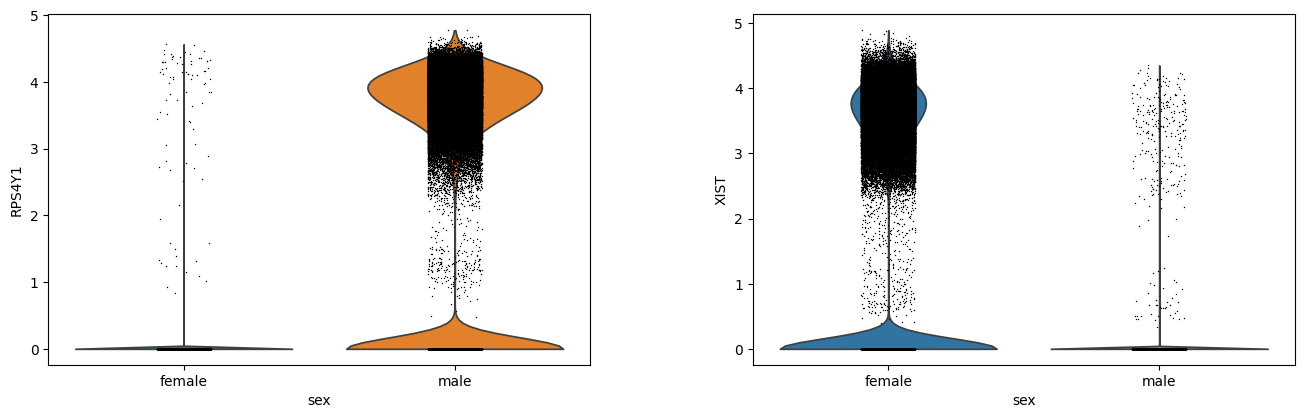

In [82]:
# Now, generate the plot and save it
sc.pl.violin(paired_adata, ["RPS4Y1", "XIST"], use_raw=False, groupby="sex", layer="log1p_norm", save="_xy_check.png")

## Check X and Y chromosome related genes

In [83]:
x_genes =  ["XIST","TSIX"]
y_genes = ["RPS4Y1","RPS4Y2","ZFY","UTY"]

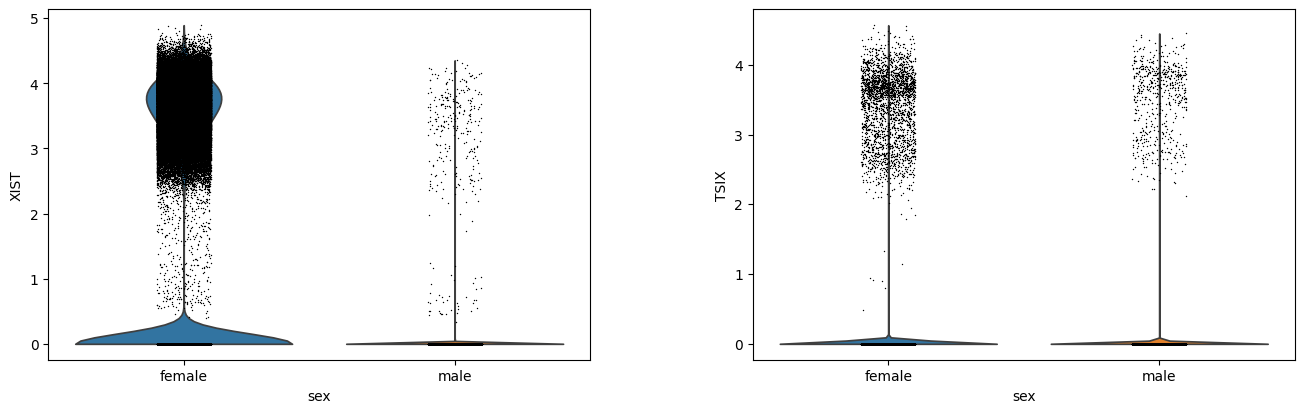

In [84]:
sc.pl.violin(paired_adata, x_genes, use_raw=False, groupby="sex", layer="log1p_norm")

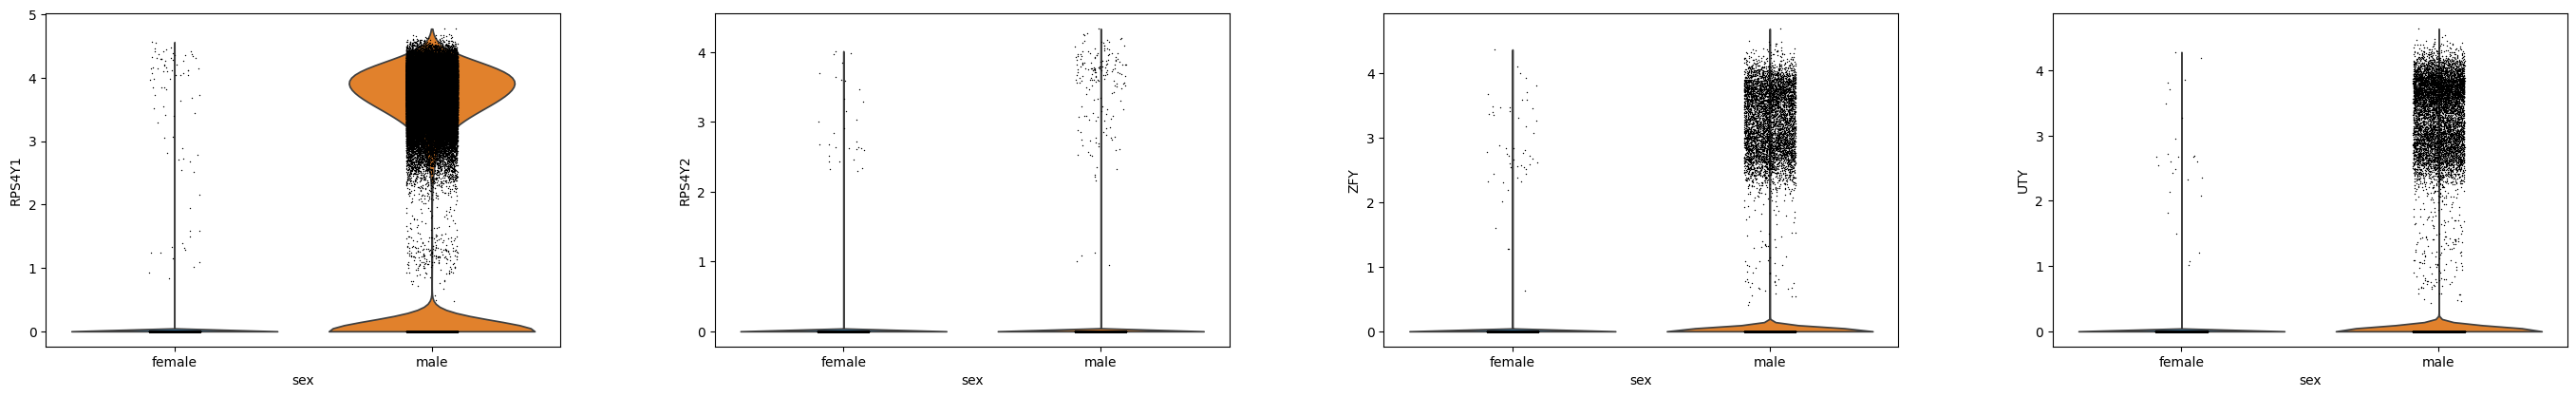

In [85]:
sc.pl.violin(paired_adata, y_genes, use_raw=False, groupby="sex", layer="log1p_norm", save="violin_y.png")

In [86]:
paired_adata.var.index.name = None

In [139]:
çpaired_adata.write_h5ad("/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/pseudobulk/paired_adata_clean_luad.h5ad")

In [7]:
paired_adata = sc.read_h5ad("/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/011_analysis_paired_remove_xy/pseudobulk/paired_adata_clean_luad.h5ad")

In [8]:
paired_adata

AnnData object with n_obs × n_vars = 350066 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts',

## SUMMARY 
- We used the sex annotation that was given in the respective datasets
- These annotations were confirmed by our analysis, as no Ygenes were in the female cohort. 

### 04.Compute pseudobulk

In [9]:
path = "/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/pseudobulk"

In [ ]:
# Get pseudo-bulk profile
#pdata = dc.get_pseudobulk(
#    paired_adata,
#    sample_col='sample',
#    groups_col='donor_id',
#    layer='count',
#    min_cells=0,
#    min_counts=0
#)

In [10]:
# Get pseudo-bulk profile
pdata = dc.get_pseudobulk(
    paired_adata,
    sample_col="sample",
    groups_col=["cell_type","origin"],
    layer="count",  # layer where raw counts are store in adata
    mode="sum",
    min_cells=0,  # we are setting this to 0 and filter in an explicit, separate step.
    min_counts=0,
)
pdata

AnnData object with n_obs × n_vars = 1161 × 17811
    obs: 'sample', 'cell_type_origin', 'uicc_stage', 'ever_smoker', 'donor_id', 'origin', 'dataset', 'ann_coarse', 'tumor_stage', 'study', 'platform', 'suspension_type', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    layers: 'psbulk_props'

In [11]:
pdata.layers["counts"] = pdata.X

In [12]:
scales_counts = sc.pp.normalize_total(pdata, target_sum=None, inplace=False)
# log1p transform
pdata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

In [13]:
#pdata.obs["age"] = pdata.obs["age"].astype("float64")
pdata.obs["is_primary_data"] = pdata.obs["is_primary_data"].astype(bool)

In [14]:
path

'/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/pseudobulk'

In [15]:
pdata.write_h5ad(f"{path}/pdata_cell_type_luad.h5ad")

In [16]:
#pdata = sc.read_h5ad(f"{path}/out/008_analysis_paired_luad/tables/input/pdata.h5ad")

In [17]:
pdata.obs

,sample,cell_type_origin,uicc_stage,ever_smoker,donor_id,origin,dataset,ann_coarse,tumor_stage,study,...,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,psbulk_n_cells,psbulk_counts
He_Fan_2021_N1_B cell_normal_adjacent,He_Fan_2021_N1,B cell_normal_adjacent,I,no,He_Fan_2021_P1,normal_adjacent,He_Fan_2021,B cell,early,He_Fan_2021,...,B cell,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,48-year-old human stage,75.0,102672.0
He_Fan_2021_N2_B cell_normal_adjacent,He_Fan_2021_N2,B cell_normal_adjacent,II,yes,He_Fan_2021_P2,normal_adjacent,He_Fan_2021,B cell,early,He_Fan_2021,...,B cell,10x 3' v2,lung adenocarcinoma,Homo sapiens,male,lung,unknown,61-year-old human stage,11.0,18468.0
He_Fan_2021_N3_B cell_normal_adjacent,He_Fan_2021_N3,B cell_normal_adjacent,I,yes,He_Fan_2021_P3,normal_adjacent,He_Fan_2021,B cell,early,He_Fan_2021,...,B cell,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,58-year-old human stage,21.0,26543.0
He_Fan_2021_N4_B cell_normal_adjacent,He_Fan_2021_N4,B cell_normal_adjacent,I,no,He_Fan_2021_P4,normal_adjacent,He_Fan_2021,B cell,early,He_Fan_2021,...,B cell,10x 3' v2,lung adenocarcinoma,Homo sapiens,male,lung,unknown,75-year-old human stage,171.0,248874.0
He_Fan_2021_N5_B cell_normal_adjacent,He_Fan_2021_N5,B cell_normal_adjacent,II,no,He_Fan_2021_P5,normal_adjacent,He_Fan_2021,B cell,early,He_Fan_2021,...,B cell,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,56-year-old human stage,38.0,99930.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKIM-V-2_P5_tumor_primary_regulatory T cell_tumor_primary,UKIM-V-2_P5_tumor_primary,regulatory T cell_tumor_primary,II,yes,UKIM-V-2_P5,tumor_primary,UKIM-V-2,T cell,early,UKIM-V,...,regulatory T cell,BD Rhapsody Whole Transcriptome Analysis,lung adenocarcinoma,Homo sapiens,female,lung,unknown,62-year-old human stage,183.0,466299.0
UKIM-V-2_P7_tumor_primary_regulatory T cell_tumor_primary,UKIM-V-2_P7_tumor_primary,regulatory T cell_tumor_primary,III,yes,UKIM-V-2_P7,tumor_primary,UKIM-V-2,T cell,advanced,UKIM-V,...,regulatory T cell,BD Rhapsody Whole Transcriptome Analysis,lung adenocarcinoma,Homo sapiens,female,lung,unknown,69-year-old human stage,90.0,188984.0
UKIM-V-2_P9_tumor_primary_regulatory T cell_tumor_primary,UKIM-V-2_P9_tumor_primary,regulatory T cell_tumor_primary,I,yes,UKIM-V-2_P9,tumor_primary,UKIM-V-2,T cell,early,UKIM-V,...,regulatory T cell,BD Rhapsody Whole Transcriptome Analysis,lung adenocarcinoma,Homo sapiens,male,lung,unknown,69-year-old human stage,629.0,1196851.0
UKIM-V_P1_tumor_primary_regulatory T cell_tumor_primary,UKIM-V_P1_tumor_primary,regulatory T cell_tumor_primary,I,yes,UKIM-V_P1,tumor_primary,UKIM-V,T cell,early,UKIM-V,...,regulatory T cell,BD Rhapsody Whole Transcriptome Analysis,lung adenocarcinoma,Homo sapiens,female,lung,unknown,65-year-old human stage,33.0,449844.0


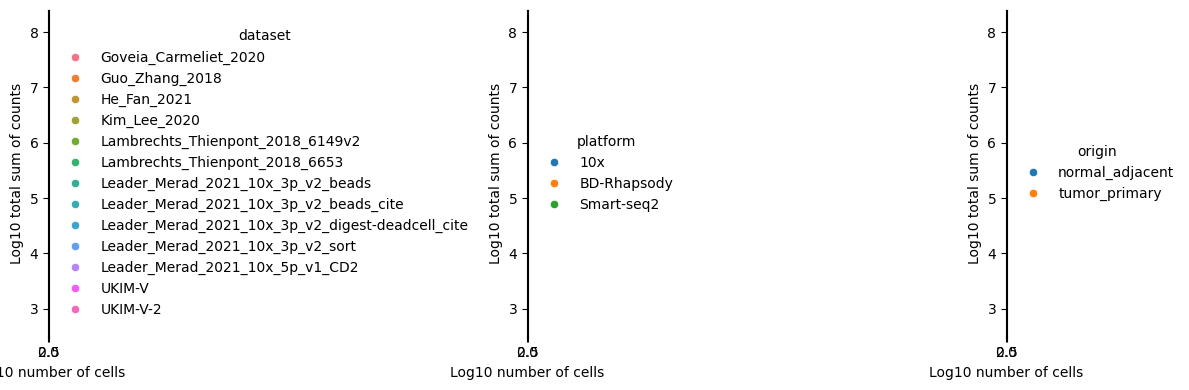

In [18]:
dc.plot_psbulk_samples(pdata, groupby=['dataset', 'platform',"origin"], figsize=(12, 4))

In [21]:
cell_types = pdata.obs["cell_type"].unique()

In [22]:
cell_types

['B cell', 'CD4+ T cell', 'CD8+ T cell', 'dendritic cell', 'epithelial cell', 'macrophage', 'malignant cell', 'neutrophil', 'regulatory T cell']
Categories (9, object): ['B cell', 'CD4+ T cell', 'CD8+ T cell', 'dendritic cell', ..., 'macrophage', 'malignant cell', 'neutrophil', 'regulatory T cell']

In [23]:
pdata_by_cell_type = {}
for ct in cell_types:
    pb = pdata[pdata.obs["cell_type"] == ct, :].copy()
    if pb.obs["origin"].nunique() <= 1:
        print(f"Cell type {ct} does not have samples in all groups")
    else:
        pdata_by_cell_type[ct] = pb

In [24]:
pdata_by_cell_type

{'B cell': AnnData object with n_obs × n_vars = 129 × 17811
     obs: 'sample', 'cell_type_origin', 'uicc_stage', 'ever_smoker', 'donor_id', 'origin', 'dataset', 'ann_coarse', 'tumor_stage', 'study', 'platform', 'suspension_type', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
     var: 'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
     layers: 'psbulk_props', 'counts', 'log1p_norm',
 'CD4+ T cell': AnnData object with n_obs × n_vars = 174 × 17811
     obs: 'sample', 'cell_type_origin', 'uicc_stage', 'ever_smoker', 'donor_i

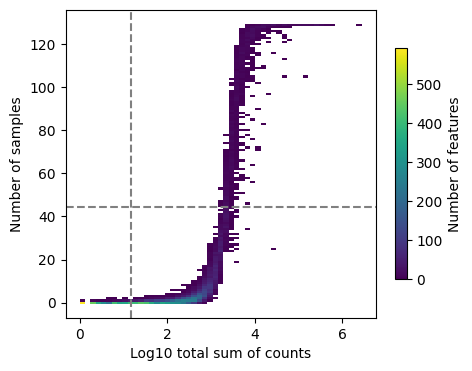

In [25]:
dc.plot_filter_by_expr(
    pdata_by_cell_type['B cell'],
    group="origin",
    min_count=10,
    min_total_count=15,
)

In [26]:
for tmp_pdata in pdata_by_cell_type.values():
    dc.filter_by_expr(
        tmp_pdata,
        group="origin",
        min_count=10,
        min_total_count=15,
    )

In [27]:
from pathlib import Path
import re


In [28]:
deseq_results = Path("/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type")

In [109]:
def _create_prefix(cell_type):
    ct_sanitized = re.sub("[^0-9a-zA-Z]+", "_", cell_type)
    prefix = deseq_results / "tumor_vs_normal" / ct_sanitized
    prefix.mkdir(parents=True, exist_ok=True)
    return prefix

In [29]:
def _create_prefix_mf(cell_type):
    ct_sanitized = re.sub("[^0-9a-zA-Z]+", "_", cell_type)
    prefix = deseq_results / "male_vs_female" / ct_sanitized
    prefix.mkdir(parents=True, exist_ok=True)
    return prefix

In [110]:
for ct, tmp_pdata in pdata_by_cell_type.items():
    prefix = _create_prefix(ct)
    print(prefix)

/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type/tumor_vs_normal/B_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type/tumor_vs_normal/CD4_T_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type/tumor_vs_normal/CD8_T_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type/tumor_vs_normal/dendritic_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type/tumor_vs_normal/epithelial_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type/tumor_vs_normal/macrophage
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type/tumor_vs_normal/malignant_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type/tumor_vs_normal/neutrophil
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_

In [30]:
for ct, tmp_pdata in pdata_by_cell_type.items():
    prefix = _create_prefix_mf(ct)
    print(prefix)

/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type/male_vs_female/B_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type/male_vs_female/CD4_T_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type/male_vs_female/CD8_T_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type/male_vs_female/dendritic_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type/male_vs_female/epithelial_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type/male_vs_female/macrophage
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type/male_vs_female/malignant_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type/male_vs_female/neutrophil
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_c

In [111]:
### Samplesheet
for ct, tmp_pdata in pdata_by_cell_type.items():
    prefix = _create_prefix(ct)
    ct_sanitized = re.sub("[^0-9a-zA-Z]+", "_", ct)

#for index, dataframe in enumerate(pdata_list):
    
    # Perform the operations
    samplesheet = tmp_pdata.obs.copy()
    samplesheet["sample"] = samplesheet.index
    samplesheet.reset_index(inplace=True)
  
    samplesheet.to_csv(f"{prefix}/samplesheet_{ct_sanitized}.csv", index=False)
    samplesheet.to_csv(f"{prefix}/samplesheet_{ct_sanitized}.tsv", index=False, sep="\t")


    ### Raw counts
    bulk_df = tmp_pdata.to_df().T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/counts_{ct_sanitized}.csv")  
    ### log1p_norm counts
    pdata_log1p_norm = pd.DataFrame(tmp_pdata.layers["log1p_norm"], 
        tmp_pdata.to_df().index, 
        tmp_pdata.to_df().columns)
    bulk_df = pdata_log1p_norm.T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/log1p_norm_counts_{ct_sanitized}.csv")    

In [112]:
### Samplesheet
for ct, tmp_pdata in pdata_by_cell_type.items():
    prefix = _create_prefix(ct)
    ct_sanitized = re.sub("[^0-9a-zA-Z]+", "_", ct)

#for index, dataframe in enumerate(pdata_list):
    
    # Perform the operations
    tmp_pdata_female = tmp_pdata[tmp_pdata.obs["sex"]=="female"]
    samplesheet = tmp_pdata_female.obs.copy()
    samplesheet["sample"] = samplesheet.index
    samplesheet.reset_index(inplace=True)
  
    samplesheet.to_csv(f"{prefix}/samplesheet_female_{ct_sanitized}.csv", index=False)
    samplesheet.to_csv(f"{prefix}/samplesheet_female_{ct_sanitized}.tsv", index=False, sep="\t")


    ### Raw counts
    bulk_df = tmp_pdata_female.to_df().T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/counts_female_{ct_sanitized}.csv")  
    ### log1p_norm counts
    pdata_log1p_norm = pd.DataFrame(tmp_pdata_female.layers["log1p_norm"], 
        tmp_pdata_female.to_df().index, 
        tmp_pdata_female.to_df().columns)
    bulk_df = pdata_log1p_norm.T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/log1p_norm_counts_female_{ct_sanitized}.csv")    

In [113]:
### Samplesheet
for ct, tmp_pdata in pdata_by_cell_type.items():
    prefix = _create_prefix(ct)
    ct_sanitized = re.sub("[^0-9a-zA-Z]+", "_", ct)

#for index, dataframe in enumerate(pdata_list):
    
    # Perform the operations
    tmp_pdata_male = tmp_pdata[tmp_pdata.obs["sex"]=="male"]
    samplesheet = tmp_pdata_male.obs.copy()
    samplesheet["sample"] = samplesheet.index
    samplesheet.reset_index(inplace=True)
  
    samplesheet.to_csv(f"{prefix}/samplesheet_male_{ct_sanitized}.csv", index=False)
    samplesheet.to_csv(f"{prefix}/samplesheet_male_{ct_sanitized}.tsv", index=False, sep="\t")


    ### Raw counts
    bulk_df = tmp_pdata_male.to_df().T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/counts_male_{ct_sanitized}.csv")  
    ### log1p_norm counts
    pdata_log1p_norm = pd.DataFrame(tmp_pdata_male.layers["log1p_norm"], 
        tmp_pdata_male.to_df().index, 
        tmp_pdata_male.to_df().columns)
    bulk_df = pdata_log1p_norm.T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/log1p_norm_counts_male_{ct_sanitized}.csv")    

In [31]:
### Samplesheet
for ct, tmp_pdata in pdata_by_cell_type.items():
    prefix = _create_prefix_mf(ct)
    ct_sanitized = re.sub("[^0-9a-zA-Z]+", "_", ct)

#for index, dataframe in enumerate(pdata_list):
    
    # Perform the operations
    tmp_pdata_normal = tmp_pdata[tmp_pdata.obs["origin"]=="normal_adjacent"]
    samplesheet = tmp_pdata_normal.obs.copy()
    samplesheet["sample"] = samplesheet.index
    samplesheet.reset_index(inplace=True)
  
    samplesheet.to_csv(f"{prefix}/samplesheet_normal_{ct_sanitized}.csv", index=False)
    samplesheet.to_csv(f"{prefix}/samplesheet_normal_{ct_sanitized}.tsv", index=False, sep="\t")


    ### Raw counts
    bulk_df = tmp_pdata_normal.to_df().T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/counts_normal_{ct_sanitized}.csv")  
    ### log1p_norm counts
    pdata_log1p_norm = pd.DataFrame(tmp_pdata_normal.layers["log1p_norm"], 
        tmp_pdata_normal.to_df().index, 
        tmp_pdata_normal.to_df().columns)
    bulk_df = pdata_log1p_norm.T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/log1p_norm_counts_normal_{ct_sanitized}.csv")    

In [32]:
### Samplesheet
for ct, tmp_pdata in pdata_by_cell_type.items():
    prefix = _create_prefix_mf(ct)
    ct_sanitized = re.sub("[^0-9a-zA-Z]+", "_", ct)

#for index, dataframe in enumerate(pdata_list):
    
    # Perform the operations
    tmp_pdata_tumor = tmp_pdata[tmp_pdata.obs["origin"]=="tumor_primary"]
    samplesheet = tmp_pdata_tumor.obs.copy()
    samplesheet["sample"] = samplesheet.index
    samplesheet.reset_index(inplace=True)
  
    samplesheet.to_csv(f"{prefix}/samplesheet_tumor_{ct_sanitized}.csv", index=False)
    samplesheet.to_csv(f"{prefix}/samplesheet_tumor_{ct_sanitized}.tsv", index=False, sep="\t")


    ### Raw counts
    bulk_df = tmp_pdata_tumor.to_df().T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/counts_tumor_{ct_sanitized}.csv")  
    ### log1p_norm counts
    pdata_log1p_norm = pd.DataFrame(tmp_pdata_tumor.layers["log1p_norm"], 
        tmp_pdata_tumor.to_df().index, 
        tmp_pdata_tumor.to_df().columns)
    bulk_df = pdata_log1p_norm.T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/log1p_norm_counts_tumor_{ct_sanitized}.csv")    

In [114]:
#pdata = pdata[pdata.obs["dataset"]!="Guo_Zhang_2018"] ## SMART SEQ 

In [115]:
#pdata

In [116]:
#dc.plot_psbulk_samples(pdata, groupby=['dataset', 'platform'], figsize=(12, 4))

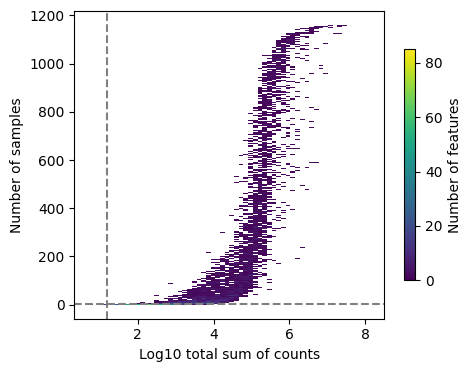

In [120]:
dc.plot_filter_by_expr(pdata, group='sample', min_count=10, min_total_count=15)

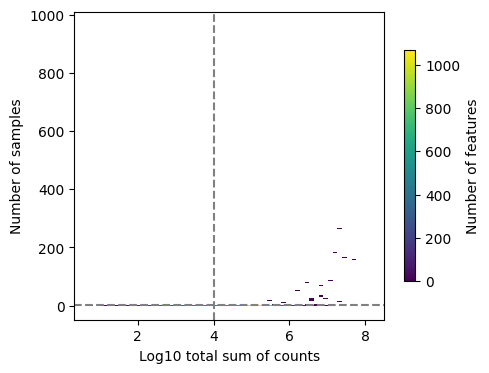

In [121]:
dc.plot_filter_by_expr(pdata, group='sample', large_n=100,min_prop=0.9, min_count=5000, min_total_count=10000)

I set this threshold for the DS analysis to avoid havinh zero-inflated data

In [122]:
# Obtain genes that pass the thresholds 
genes = dc.filter_by_expr(pdata, group='sample', min_count=5000, min_total_count=10000)

# Filter by these genes
pdata = pdata[:, genes].copy()
pdata

AnnData object with n_obs × n_vars = 1161 × 129
    obs: 'sample', 'cell_type_origin', 'uicc_stage', 'ever_smoker', 'donor_id', 'origin', 'dataset', 'ann_coarse', 'tumor_stage', 'study', 'platform', 'suspension_type', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    layers: 'psbulk_props', 'counts', 'log1p_norm'

In [123]:
pdata.layers["counts"] = pdata.X

In [124]:
scales_counts = sc.pp.normalize_total(pdata, target_sum=None, inplace=False)
# log1p transform
pdata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

In [125]:
pdata

AnnData object with n_obs × n_vars = 1161 × 129
    obs: 'sample', 'cell_type_origin', 'uicc_stage', 'ever_smoker', 'donor_id', 'origin', 'dataset', 'ann_coarse', 'tumor_stage', 'study', 'platform', 'suspension_type', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    layers: 'psbulk_props', 'counts', 'log1p_norm'

In [126]:
pdata.write_h5ad("/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/pseudobulk/pdata_luad.h5ad")

In [127]:
### Samplesheet
samplesheet = pdata.obs.copy()
samplesheet["sample"]=samplesheet.index
samplesheet.reset_index(inplace=True)

In [128]:
samplesheet.to_csv(f"{path}samplesheet.csv", index=False)
samplesheet.to_csv(f"{path}samplesheet.tsv", index=False, sep = "\t")

In [129]:
bulk_df = pdata.to_df().T

In [130]:
### Raw counts
bulk_df = pdata.to_df().T
#bulk_df["gene_id"]=bulk_df.index
bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")

In [131]:
bulk_df.to_csv(f"{path}counts.csv")    

In [132]:
### log1p_norm counts
pdata_log1p_norm = pd.DataFrame(pdata.layers["log1p_norm"], 
    pdata.to_df().index, 
    pdata.to_df().columns)
bulk_df = pdata_log1p_norm.T
#bulk_df["gene_id"]=bulk_df.index'
bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
bulk_df.to_csv(f"{path}log1p_norm_counts.csv")    

### 0.4 Create counts and samplesheet independent for tumor and normal for DESEQ2 

In [133]:
pdata_normal = pdata[pdata.obs["origin"]=="normal_adjacent"]
pdata_tumor = pdata[pdata.obs["origin"]=="tumor_primary"]

In [134]:
pdata_normal

View of AnnData object with n_obs × n_vars = 539 × 129
    obs: 'sample', 'cell_type_origin', 'uicc_stage', 'ever_smoker', 'donor_id', 'origin', 'dataset', 'ann_coarse', 'tumor_stage', 'study', 'platform', 'suspension_type', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    layers: 'psbulk_props', 'counts', 'log1p_norm'

In [135]:
pdata_list = [pdata_normal,pdata_tumor]
pdata_list_name = ["normal","tumor"]

for index, dataframe in enumerate(pdata_list):
    print(pdata_list_name[index])
    # Perform the operations
    samplesheet = dataframe.obs.copy()
    samplesheet["sample"] = samplesheet.index
    samplesheet.reset_index(inplace=True)
  
    samplesheet.to_csv(f"{path}samplesheet_{pdata_list_name[index]}.csv", index=False)
    samplesheet.to_csv(f"{path}samplesheet_{pdata_list_name[index]}.tsv", index=False, sep="\t")


    ### Raw counts
    bulk_df = dataframe.to_df().T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{path}counts_{pdata_list_name[index]}.csv")  
    ### log1p_norm counts
    pdata_log1p_norm = pd.DataFrame(dataframe.layers["log1p_norm"], 
        dataframe.to_df().index, 
        dataframe.to_df().columns)
    bulk_df = pdata_log1p_norm.T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{path}/log1p_norm_counts_{pdata_list_name[index]}.csv")    

normal
tumor


### 0.4 Create counts and samplesheet independent for male and female for DESEQ2 

In [136]:
pdata_male = pdata[pdata.obs["sex"]=="male"]
pdata_female = pdata[pdata.obs["sex"]=="female"]

In [137]:
pdata_male

View of AnnData object with n_obs × n_vars = 479 × 129
    obs: 'sample', 'cell_type_origin', 'uicc_stage', 'ever_smoker', 'donor_id', 'origin', 'dataset', 'ann_coarse', 'tumor_stage', 'study', 'platform', 'suspension_type', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    layers: 'psbulk_props', 'counts', 'log1p_norm'

In [138]:
pdata_list = [pdata_male,pdata_female]
pdata_list_name = ["male","female"]

for index, dataframe in enumerate(pdata_list):
    print(pdata_list_name[index])
    # Perform the operations
    samplesheet = dataframe.obs.copy()
    samplesheet["sample"] = samplesheet.index
    samplesheet.reset_index(inplace=True)
  
    samplesheet.to_csv(f"{path}samplesheet_{pdata_list_name[index]}.csv", index=False)
    samplesheet.to_csv(f"{path}samplesheet_{pdata_list_name[index]}.tsv", index=False, sep="\t")


    ### Raw counts
    bulk_df = dataframe.to_df().T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{path}counts_{pdata_list_name[index]}.csv")  
    ### log1p_norm counts
    pdata_log1p_norm = pd.DataFrame(dataframe.layers["log1p_norm"], 
        dataframe.to_df().index, 
        dataframe.to_df().columns)
    bulk_df = pdata_log1p_norm.T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{path}/log1p_norm_counts_{pdata_list_name[index]}.csv")    

male
female
